In [40]:
import pandas as pd
import seaborn
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

In [4]:
# carregar dados de treino e teste
train = pd.read_csv('./data/train.csv')
test = pd.read_csv('./data/test.csv')
# verificar tipos das colunas
train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [5]:
# retirar dados irrelevantes
train.drop(['Name', 'Ticket', 'Cabin'], axis=1, inplace=True)
test.drop(['Name', 'Ticket', 'Cabin'], axis=1, inplace=True)

In [6]:
# one hot encoding
train = pd.get_dummies(train)
test = pd.get_dummies(test)

In [7]:
# verificar nulls no df de treino
train.isnull().sum().sort_values(ascending=False)

Age            177
Embarked_S       0
Embarked_Q       0
Embarked_C       0
Sex_male         0
Sex_female       0
Fare             0
Parch            0
SibSp            0
Pclass           0
Survived         0
PassengerId      0
dtype: int64

In [8]:
# verificar nulls no df de teste
test.isnull().sum().sort_values(ascending=False)

Age            86
Fare            1
Embarked_S      0
Embarked_Q      0
Embarked_C      0
Sex_male        0
Sex_female      0
Parch           0
SibSp           0
Pclass          0
PassengerId     0
dtype: int64

In [9]:
# replace null pela media de idade
train['Age'].fillna(train['Age'].mean(), inplace=True)
test['Age'].fillna(test['Age'].mean(), inplace=True)
test['Fare'].fillna(test['Fare'].mean(), inplace=True)

In [10]:
# como nao tenho o target do conjunto de teste a ser submetido, 
# tenho que separar o arquivo de treino em treino_treino e treino_teste,
# para medir o score sem vies/vicio
train_train, train_test = train_test_split(train, test_size=0.3, random_state=42)

# separacao das features e target
train_X = train_train.drop('Survived', axis=1)
train_y = train_train['Survived']
test_X = train_test.drop('Survived', axis=1)
test_y = train_test['Survived']

# verificar o score do conjunto de treino
tree = DecisionTreeClassifier(max_depth=4, random_state=2)
tree.fit(train_X, train_y)
tree.score(test_X, test_y)

0.82089552238805974

In [30]:
test_y_pred = tree.predict(train_X)
tree.score(test_X, test_y)

0.82089552238805974

In [16]:
results = pd.DataFrame()
results['PassengerId'] = test['PassengerId']
results['Survived'] = tree.predict(test)

In [43]:
results.to_csv('./output/results.csv', index=False)

In [44]:
from sklearn.metrics import confusion_matrix
import numpy as np
import itertools
import matplotlib.pyplot as plt

In [51]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=0)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [53]:
len(train_y), len(test_y_pred)

(623, 623)

Confusion matrix, without normalization
[[345  47]
 [ 50 181]]
Normalized confusion matrix
[[ 0.88  0.12]
 [ 0.22  0.78]]


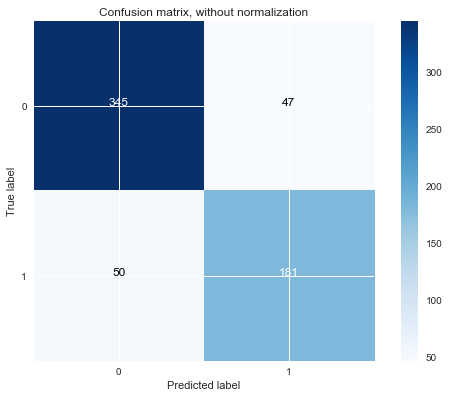

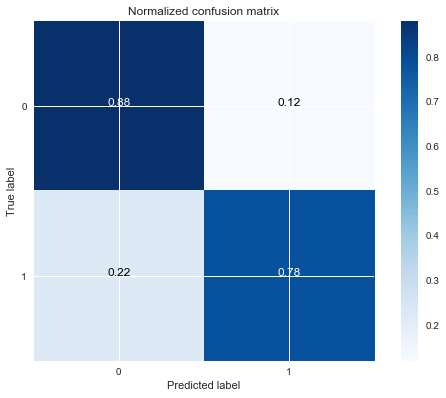

In [55]:
class_names = [0,1]

# Compute confusion matrix
cnf_matrix = confusion_matrix(train_y, test_y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()